<a href="https://colab.research.google.com/github/ChhaSahil/GDAC/blob/main/GDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Data Analytics Capstone Project (Case Study)


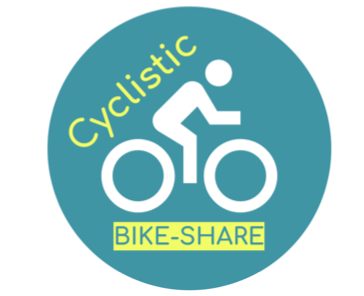

##Case Briefing:

###**Cyclistic** is a bike sharing company in Chicago. The company wants to maximize **annual memberships** so they have asked to analyze the last year data and find how the subscribers of Cyclistic(termed as 'member' in the dataset) use the services compared to non subscibers(termed as 'casual').


####For more information about the case refer the repo link: [Google Data Analytics Repo](https://github.com/ChhaSahil/GDAC)

So that we can use R if required we should downgrade our python version

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310205 sha256=09ac8dd10edbaefaa7496d82dda4b2c2e0490cbde4a3b8650b6fc57c06d44491
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

Let's import necessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from plotly.subplots import make_subplots

Now we will import the dataset which we have cleaned a bit before. Check this link if you want to refer to the cleaning section - Data Cleaning Link = https://colab.research.google.com/drive/1EV1E6rJlmqd5SK1ftte-yjGR3t1enWg2?usp=sharing

In [3]:
data = pd.read_csv('/content/drive/MyDrive/GDAC/GDAC.csv')

Few Checks on our dataset

In [4]:
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0.699548
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual,0.694323
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member,1.000834
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual,2.462783
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member,0.814539


In [5]:
data.shape

(5319597, 11)

In [6]:
data.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
member_casual          object
ride_length           float64
dtype: object

In [7]:
data.isnull().sum()

Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    774380
start_station_id      774380
end_station_name      807325
end_station_id        807325
member_casual              0
ride_length                0
dtype: int64

Since we have found that the services are not far from one another. Hence we wont have to handle those missing station names

In [8]:
data.drop(['start_station_name','start_station_id','end_station_name','end_station_id'],axis=1,inplace=True)

In [9]:
data.drop(['ride_length'],axis=1,inplace=True)

In [10]:
data.isnull().sum()

Unnamed: 0       0
ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(5319597, 6)

Hence our dataset has no duplicates

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


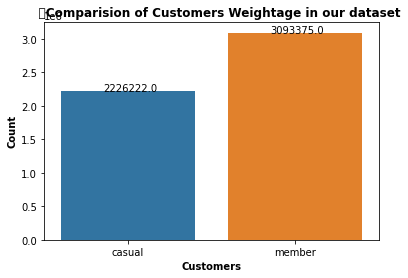

In [13]:
ax=sns.countplot(data['member_casual'])
plt.ylabel('COUNT',weight = 'bold')
plt.xlabel('Comparison b/w Members and Non Members Count',weight='bold')
plt.title('    \tComparision of Customers Weightage in our dataset',weight='bold')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set(xlabel='Customers',ylabel='Count')
plt.show()

Hence we can say that there is no sampling bias in our dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


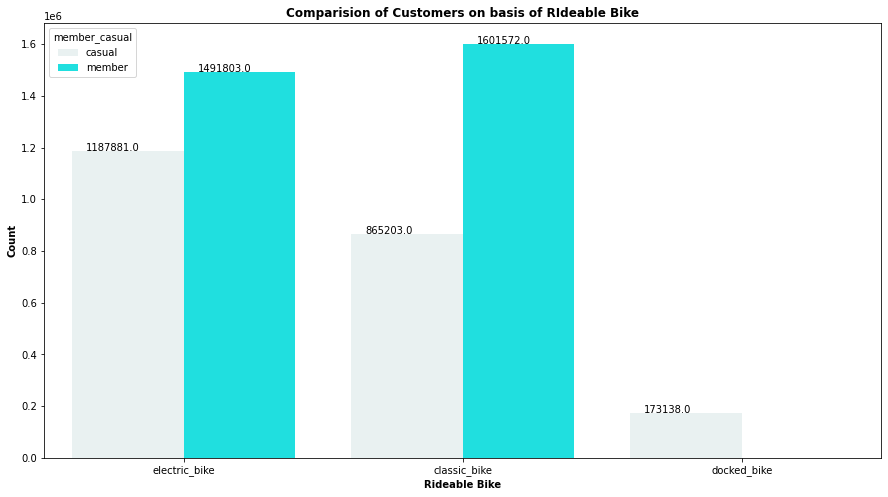

In [14]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data['rideable_type'],hue=data['member_casual'],color='Cyan')
plt.ylabel('COUNT',weight = 'bold')
plt.title('Comparision of Customers on basis of RIdeable Bike', weight ='bold')
plt.xlabel('Rideable Bike',weight='bold')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
ax.set(xlabel='Rideable Bike',ylabel='Count')
plt.show()

* Hence Customers with annual subscriptions use mostly 
electronic and classic bike. Docked bike is only used by casual customers.
* Since Casual Customers are using bike service for only a day, hence they are preferring electric bikes oer the other two

In [61]:
bike_month = data.groupby(['month','rideable_type']).size().reset_index(name='counts') # Analysing month wise bike requirement

In [71]:
px.bar(data_frame = bike_month, x = 'month', y='counts', color = 'rideable_type',title = '<b>Month-Wise Comparision of Rideable Bike Usage</b>',barmode='group',color_discrete_map = {'member':'Cyan','casual':'yellow'})

####July, August and September have high service rate of electic bike whereas January, February, May, June have high service rate for classic bikes 

In [15]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [16]:
data['ride_time']= data['ended_at'] - data['started_at']

In [17]:
data.dtypes

Unnamed: 0                 int64
ride_id                   object
rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
member_casual             object
ride_time        timedelta64[ns]
dtype: object

In [18]:
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,member_casual,ride_time
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,0 days 00:02:57
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,0 days 00:04:21
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,member,0 days 00:04:21
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,casual,0 days 00:14:56
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,member,0 days 00:06:02


In [19]:
data.dtypes

Unnamed: 0                 int64
ride_id                   object
rideable_type             object
started_at        datetime64[ns]
ended_at          datetime64[ns]
member_casual             object
ride_time        timedelta64[ns]
dtype: object

Below is the reference how we are going to extrct the time information

In [20]:
dt1 = datetime.datetime(2022,3,27,13,27,45,46000) 
dt2 = datetime.datetime(2022,6,30,14,28) 
tdelta = dt2 - dt1 
print(tdelta) 
print(type(tdelta))
print(tdelta.days)
print(type(tdelta.days))
print(tdelta.total_seconds()//60)


95 days, 1:00:14.954000
<class 'datetime.timedelta'>
95
<class 'int'>
136860.0


In [21]:
def days(d1,d2):
  t_diff = d2-d1
  days = t_diff.days
  if days<0:
    return 0
  else:
    return days


In [22]:
def time(d1,d2):
  t_diff = d2-d1
  return t_diff.total_seconds()//60

In [23]:
data['seconds_length'] = data.apply(lambda x:time(x.started_at,x.ended_at),axis=1)

In [24]:
m = data['seconds_length'].max()

In [25]:
m

41387.0

In [26]:
minimum = data['seconds_length'].min()

In [27]:
minimum

-10354.0

Since our data consists of points where start time is greater than end time we need to handle it

Here we would assume that the there is error in storing the data and by mistake the end time is stored at start time. hence we will take absolute value

In [28]:
def abso(day):
  if day>0:
    return day
  else:
    return abs(day)  

In [29]:
data['seconds_length'] = data['seconds_length'].apply(abso)

In [30]:
data['days'] = data.apply(lambda x:days(x.started_at,x.ended_at),axis=1)

In [31]:
data['started_at_day'] = data['started_at'].dt.day_name()
data['ended_at_day'] = data['ended_at'].dt.day_name()

In [32]:
data['month'] = data['started_at'].dt.month_name()

###Let's Group our data for further analysis

In [33]:
month_week = data.groupby(by=['month','started_at_day']).size().reset_index(name = 'counts')

In [34]:
mon_mem = data.groupby(by=['member_casual','month']).size().reset_index(name='counts')

In [35]:
day_mem = data.groupby(by=['member_casual','started_at_day']).size().reset_index(name='counts')

In [36]:
data.rename(columns={'seconds_length':'minutes_length'},inplace=True)

In [37]:
min_mem = data[['member_casual','minutes_length']].groupby(['member_casual'],as_index=False).mean()

###Let's start visualizing our grouped data

In [38]:
px.bar(data_frame = mon_mem, x = 'month', y='counts', color = 'member_casual',barmode='group',title='Comparision between Customers on basis of Month',color_discrete_map = {'member':'green','casual':'yellow'})

#### June, July, August and September witnesses high service rate for both types of customers while February, March, November and January sees low customer rates.


####January, February, March, April and November have lower casual customers rate

In [69]:
px.bar(data_frame=day_mem, x="started_at_day", y="counts", color="member_casual",title='<b>Comparision of Customers based on WeekDays</b>' ,barmode="group",color_discrete_map = {'member':'green','casual':'yellow'})

####Weekends have **Casual Members** using Cyclistic services more compared to the **Members**(subscribers). Weekdays have the other way round.


So one can infer that the 'Members' might be using the cyclistics services for work purposes

In [40]:
day_mem_mode = data.groupby(['member_casual'])['started_at_day'].apply(pd.Series.mode)
day_mem_mode

member_casual   
casual         0    Saturday
member         0    Thursday
Name: started_at_day, dtype: object

Hence according to our dataset casual members have saturday as their mode of the weekdays while member have thursday as their mode of the weekdays

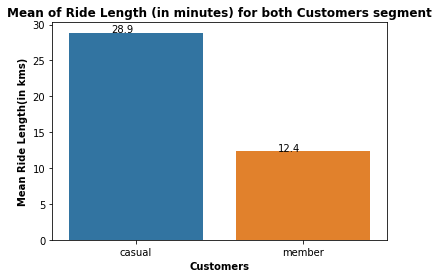

In [68]:
ax=sns.barplot(data = min_mem,x = 'member_casual',y = 'minutes_length')
plt.title('Mean of Ride Length (in minutes) for both Customers segment',weight='bold')
plt.ylabel('COUNT',weight = 'bold')
plt.xlabel('Mean of Ride Length (in minutes) for both Customers segment',weight='bold')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set(xlabel='Customers',ylabel='Mean Ride Length(in kms)')
plt.show()

####Now we will make a column time_of_day to have information about which phase of day was going when service was taken

In [45]:
t = data['started_at'].to_list()

In [49]:
time = []
for i in range(len(t)):
  time.append(t[i].time())


In [54]:
tod = []
for j in range(len(time)):
  if pd.to_datetime('12:00:00').time()>time[j]>pd.to_datetime('4:00:00').time() :
    tod.append('Morning')
  elif time[j]>=pd.to_datetime('12:00:00').time() and time[j]<pd.to_datetime('16:00:00').time():
    tod.append('Evening')
  else:  
    tod.append('Night')

In [52]:
len(tod)

4523190

In [53]:
len(time)

5319597

In [55]:
data['time_of_day'] = pd.DataFrame(tod)

Let's check whether we have done the creation in right manner or not!

In [56]:
data.isnull().sum()

Unnamed: 0        0
ride_id           0
rideable_type     0
started_at        0
ended_at          0
member_casual     0
ride_time         0
minutes_length    0
days              0
started_at_day    0
ended_at_day      0
month             0
time_of_day       0
dtype: int64

In [57]:
tod_mem = data.groupby(['member_casual','time_of_day']).size().reset_index(name = 'counts') # Grouping on basis of time of day for further analysis

In [67]:
px.bar(data_frame = tod_mem, x = 'time_of_day', y='counts', color = 'member_casual',title = '<b>Comparision of Service usage day time wise</b>',barmode='group',color_discrete_map = {'member':'green','casual':'yellow'})


From the above graph one can conclude that **members** of cyclistic use it's services more after 12PM while **casual** customer use night time to use cyclistic service

Month Wise week day comparision

In [59]:
month_day = data.groupby(['started_at_day','month']).size().reset_index(name='counts')

[Text(0.5, 1.0, 'Services Used WeekDay wise for Every Month For last year')]

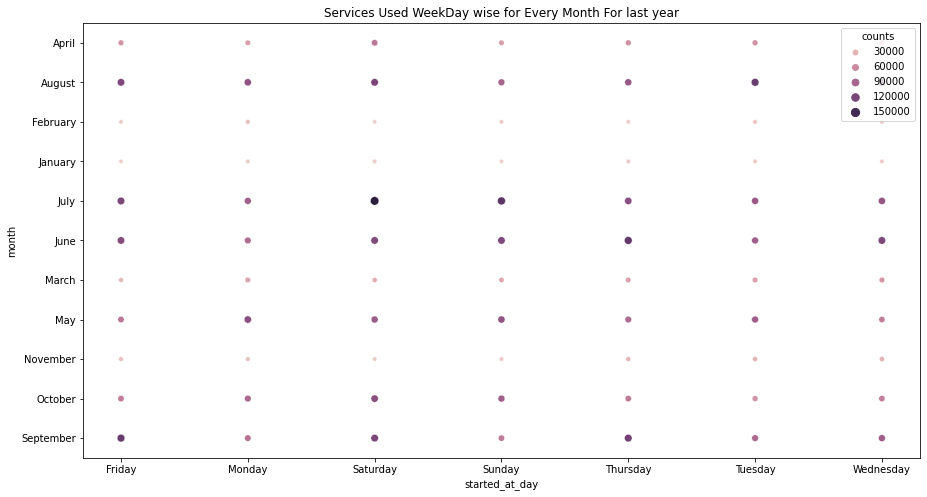

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=month_day,y='month',x='started_at_day',size='counts',hue='counts').set(title = 'Services Used WeekDay wise for Every Month For last year')

####Few of the points one can conclude from above scatter plot :

* Saturdays of July is used more by Cyclistic Customers compared to any other day of any month. It can be possible that it a holiday time in **Chicago**

* Service consumption on Sundays is not that high for any month

* January, February, March have worst consumption rate compared to other months

* Months like July, August, September have days like Thursday, Friday, Saturday best than any other month

###Let's Divide the dataset into customers segment

In [74]:
casual_mem = data[data['member_casual']=='casual']
members_mem = data[data['member_casual']=='member']

Now we will group them on basis of day time

In [79]:
casual_mem_tod = casual_mem.groupby(['time_of_day','rideable_type']).size().reset_index(name = 'counts')
members_mem_tod = members_mem.groupby(['time_of_day','rideable_type']).size().reset_index(name = 'counts')

In [106]:
fig = make_subplots(rows=2, cols=1)

fig1 = px.bar(data_frame = casual_mem_tod, x = 'time_of_day', y='counts', color = 'rideable_type',title = '<b>Time of day wise Comparision of Rideable Bike Usage for Casual Customers</b>',barmode='stack',color_discrete_map = {'electric_bike':'Cyan','classic_bike':'yellow','docked_bike':'red'})
fig2 = px.bar(data_frame = members_mem_tod, x = 'time_of_day', y='counts', color = 'rideable_type',title = '<b>Time of day wise Comparision of Rideable Bike Usage for Members</b>',barmode='stack',color_discrete_map = {'electric_bike':'Cyan','classic_bike':'yellow','docked_bike':'red'})

fig1

In [107]:
fig2

### **Final Conclusions and Recommendations**

* Customers with **annual subscription**(termed as member) use bikes for their commuting purposes while **Casual** Customers use bikes for fun and other activities most probably in their leisure time hence Cyclistic can introduce **competitions** for members of Cyclistic which would attract casual customers

* Even though the number of members of Cyclistic are more than casual customers still the mean ride length for casual customers is almost double that for members. Cyclistic can introduce weekly rewards for its annual subscribers for completing certain ride length(again to attract casual customers)


* Casual Customers ride more on *Saturdays* while Members ride more often on Thursday. The Company can increase the one time charges and keep special annual weekend subscriptions